# Homework 10 - Programming Problem

## 2. (40 pts) Denote by pk the wombat population and by fk the size of the wombat’s food supply, both at time k.

• From one time step to the next, half of the existing wombat population dies.

• From one time step to the next, the number of new wombats added to the population is equal to twice the food supply.

• The food supply is constant except for zero-mean random fluctuations with a variance of 10.

• At each time step, the wombat population is counted with an error that has zero mean and a variance of 10. 

The initial state consists of
$$p_0 = 650$$
$$f_0 = 250$$

The initial state estimate and uncertainty are

$$p_0 = 600$$
$$E ((\hat{p}_0 − p_0)^2) = 500$$
$$\hat{f}_0 = 200$$
$$E ((\hat{f}_0 − f_0)^2) = 200$$

### (a) (4 pts) Write the discrete-time system describing the wombat population and food supply. Include the output equation.

Wombat population update:
$$p_{k+1} = \frac{1}{2}p_k + 2f_k$$

Food supply update:
$$f_{k+1} = f_k + w_k, w_k ~ N(0,10)$$
Here, $w_k$ represents zero-mean random fluctuations in the food supply with a variance of 10.

Output Equation:
$$y_k = p_k + v_k, v_k ~ N(0,10)$$
where $v_k$ represents the observation noise with zero mean and a variance of 10.

### (b) (36 pts) Implement the Kalman filter to estimate population and food supply. Simulate the system and the Kalman filter for 40 steps. Hand in the following:

In [ ]:
import numpy as np
import matplotlib as plt

In [18]:
num_steps = 40

p_true = 650
f_true = 250
true_states = np.zeros((2, num_steps))
true_states[:, 0] = [p_true, f_true]

p_est = 600
f_est = 200
estimated_states = np.zeros((2, num_steps))
estimated_states[:, 0] = [p_est, f_est]

std_pop_errors = []
std_food_errors = []

# Initial covariance matrix
P = np.array([[500, 0], [0, 200]])

# Process noise covariance matrix
Q = np.array([[0, 0], [0, 10]])

# Measurement noise covariance
R = 10

# State transition matrix
A = np.array([[0.5, 2], [0, 1]])

# Measurement matrix
H = np.array([[1, 0]])

for k in range(1, num_steps):
    # Generate true population and food supply with process noise
    w_k = np.random.normal(0, np.sqrt(10))
    true_states[:, k] = A @ true_states[:, k - 1] + np.array([0, w_k])
    
    # Observation with measurement noise
    v_k = np.random.normal(0, np.sqrt(10))
    y_k = H @ true_states[:, k] + v_k
    
    # Prediction step
    x_pred = A @ estimated_states[:, k - 1]
    P_pred = A @ P @ A.T + Q
    
    # Kalman gain
    K = P_pred @ H.T @ np.linalg.inv(H @ P_pred @ H.T + R)
    
    # Update step
    estimated_states[:, k] = x_pred + K @ (y_k - H @ x_pred)
    P = (np.eye(2) - K @ H) @ P_pred

    # Calculate standard deviations of the estimation errors
    std_pop_error = np.sqrt(P[0, 0])
    std_food_error = np.sqrt(P[1, 1])

    std_pop_errors.append(std_pop_error)
    std_food_errors.append(std_food_error)

**NOTE: your outputs may look different than mine due to the variances.**

#### 1. (4 pts) a plot showing the true population and the estimated population as functions of time

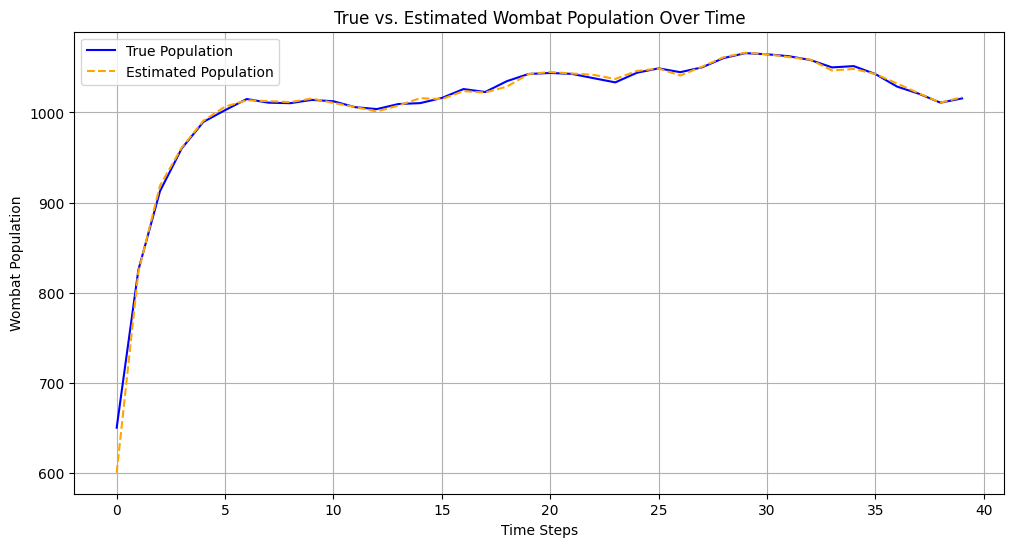

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(true_states[0, :], label='True Population', color='blue')
plt.plot(estimated_states[0, :], label='Estimated Population', color='orange', linestyle='--')
plt.xlabel('Time Steps')
plt.ylabel('Wombat Population')
plt.title('True vs. Estimated Wombat Population Over Time')
plt.legend()
plt.grid(True)
plt.show()

Output:

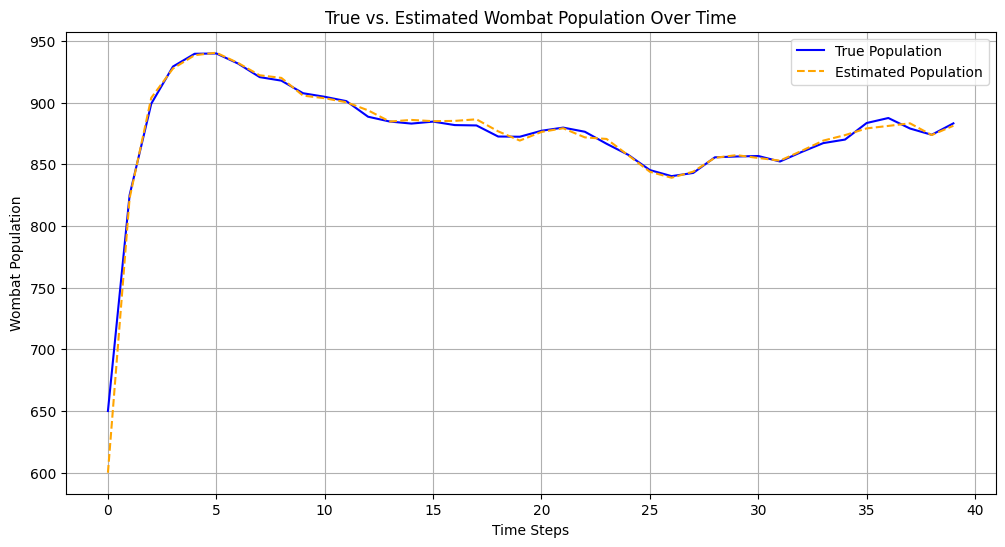

#### 2. (3 pts) a plot showing the true food supply and the estimated food supply as functions of time;

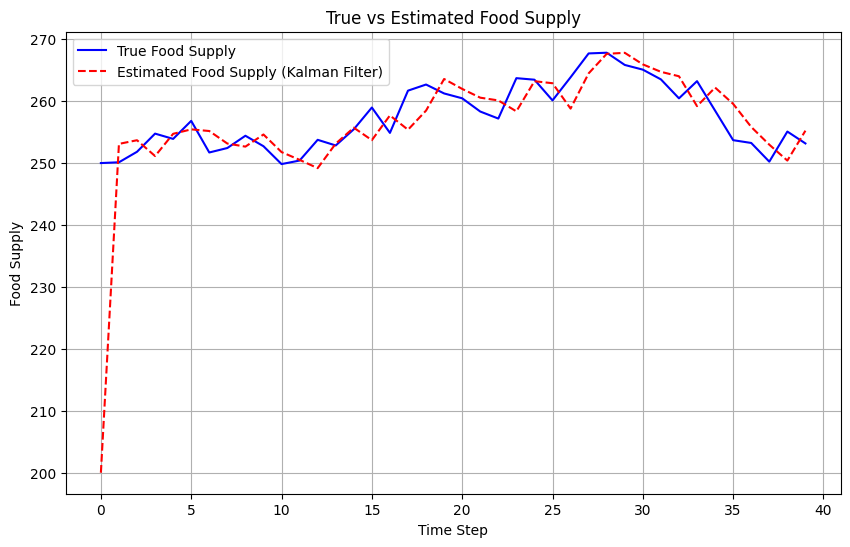

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(true_states[1, :], label='True Food Supply', color='blue')
plt.plot(estimated_states[1, :], label='Estimated Food Supply (Kalman Filter)', color='red', linestyle='--')
plt.xlabel('Time Step')
plt.ylabel('Food Supply')
plt.title('True vs Estimated Food Supply')
plt.legend()
plt.grid(True)
plt.show()

Output:

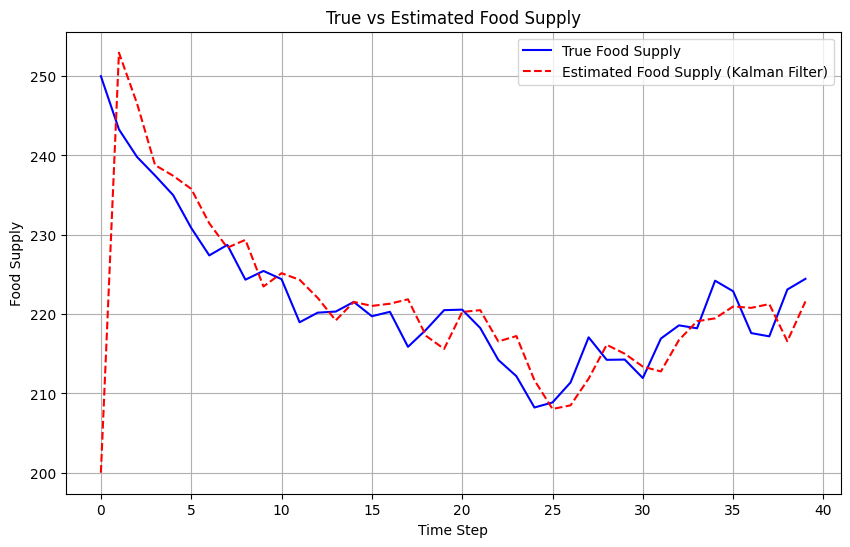

#### 3. (4 pts) a plot showing the standard deviations of the population and food supply estimation errors as functions of time.

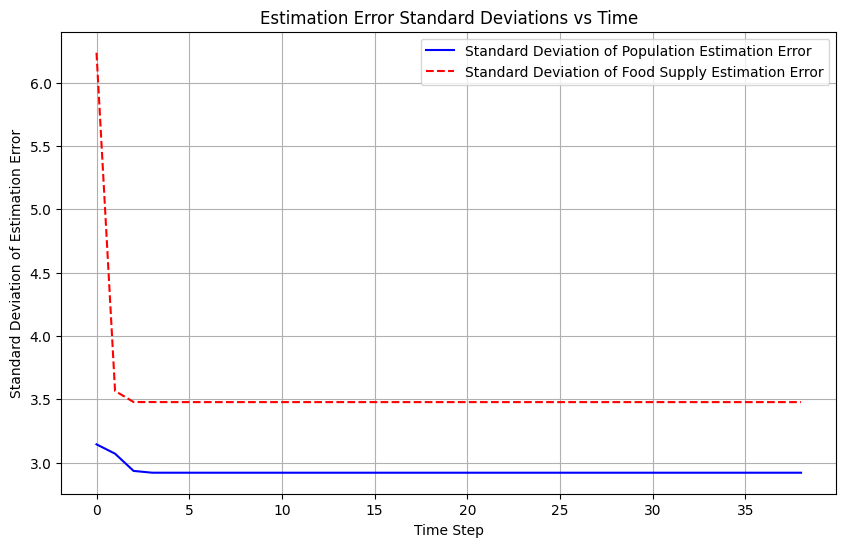

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(std_pop_errors, label='Standard Deviation of Population Estimation Error', color='blue')
plt.plot(std_food_errors, label='Standard Deviation of Food Supply Estimation Error', color='red', linestyle='--')
plt.xlabel('Time Step')
plt.ylabel('Standard Deviation of Estimation Error')
plt.title('Estimation Error Standard Deviations vs Time')
plt.legend()
plt.grid(True)
plt.show()

Output:

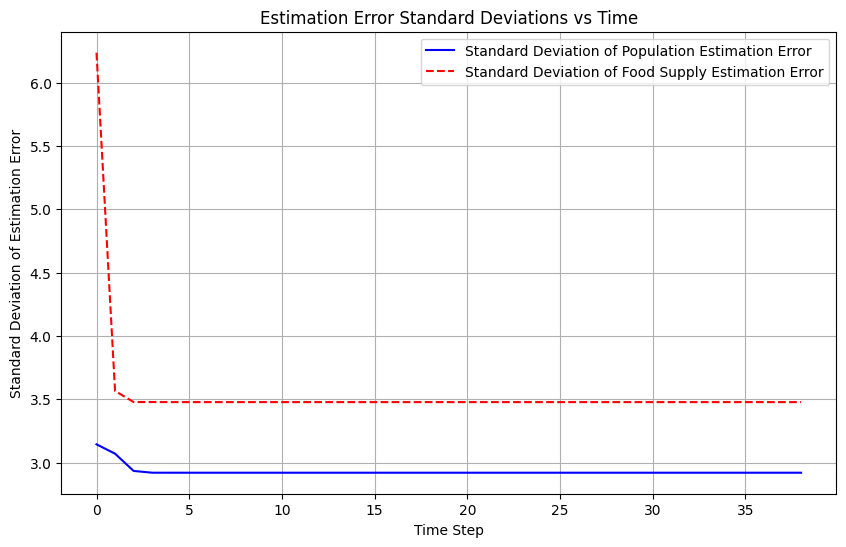